In [1]:
# change current working directory
%cd ..

/Users/alpha/Developer/qtrader


# Week 8

Market Simulation
* **Moments**: evaluation criterion
* **Arbitrage**: evaluation criterion
* **`VAE`**: vanilla variational autoencoder architecure
* **`GAN`**: vanilla generative adversarial network

In [2]:
import qtrader
# simulation tests
from qtrader.simulation.tests import Arbitrage, Moments

import yaml

import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

In [3]:
# fetch configuration file
config = yaml.load(open('config/simulation.yaml', 'r'))

## Data Source

In [4]:
# original returns time-series
try:
    # use cached CSV file
    returns = qtrader.envs.data_loader.Finance.Returns(
        config['tickers'], start_date=config['start_date'], csv=config['csv_file_returns'])
except:
    # download data
    returns = qtrader.envs.data_loader.Finance.Returns(
        config['tickers'], start_date=config['start_date'])
    # cache to CSV file
    returns.to_csv(config['csv_file_returns'])

In [5]:
# remove infinities and NaN values
returns = qtrader.utils.pandas.clean(returns)
# original rolling data
rolling_returns = qtrader.utils.rolling2d(
    returns.values, config['window']).mean(axis=1)

## `AAFT` Simulation

In [6]:
# generated returns time-series
returns_gen = qtrader.simulation.AAFT(
    returns, random=np.random.normal, random_state=13)
# generated rolling data
rolling_returns_gen = qtrader.utils.rolling2d(
    returns_gen.values, config['window']).mean(axis=1)

## Tests

Evaluation metrics for simulated data, comparison basis for generative models.

### Moments



(False,
 {'first': (False,
   array([ 2.61247479,  2.05711303,  6.30069864,  0.06619121,  2.93352188,
           2.37320331,  2.36845093, 62.82657437])),
  'second': (False, 0.7203235164794043)})

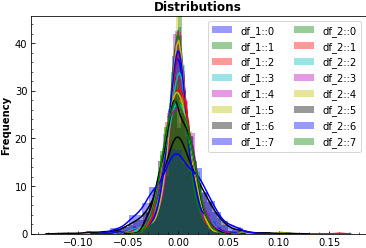

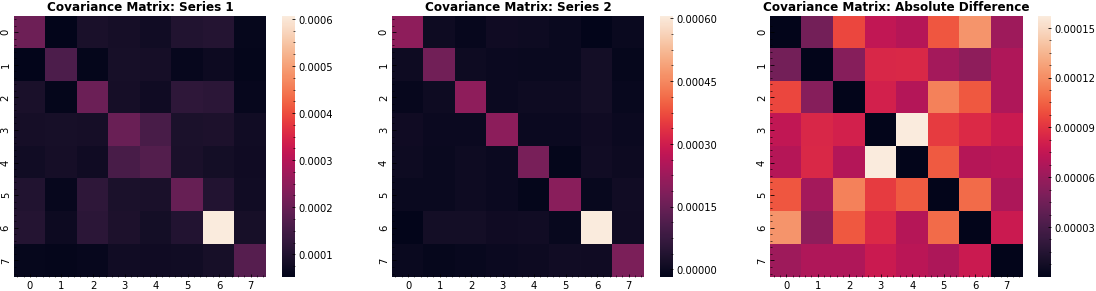

In [7]:
Moments.run(returns.values, returns_gen.values, render=True)

### Rolling Moments



(False,
 {'first': (False,
   array([2.81620153, 1.94650523, 9.81194156, 0.15294224, 3.27001556,
          2.4447149 , 2.38265812, 1.42659849])),
  'second': (False, 0.5877584468920929)})

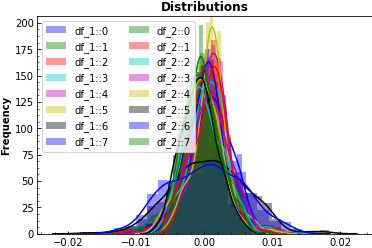

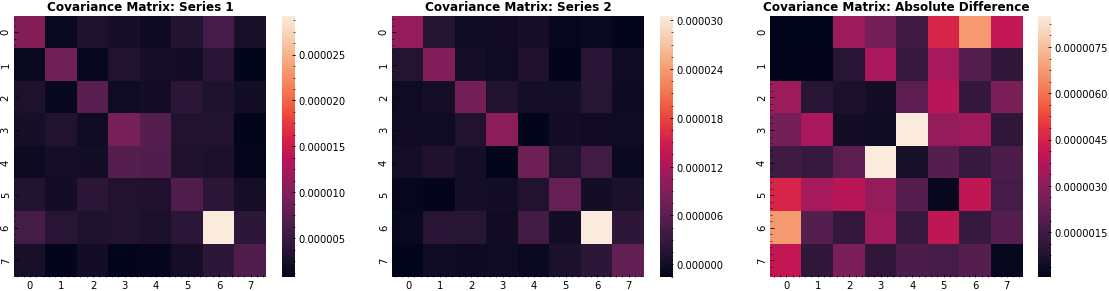

In [8]:
Moments.run(rolling_returns, rolling_returns_gen, render=True)

### Statistical Arbitrage



INFO:qtrader:New agent <qtrader.agents.quadratic.QuadraticAgent object at 0x108e9f6d8> registered in <TradingEnv instance>
INFO:qtrader:New agent <qtrader.agents.random.RandomAgent object at 0x108e9ff98> registered in <TradingEnv instance>
INFO:qtrader:New agent <qtrader.agents.quadratic.QuadraticAgent object at 0x108ee1d68> registered in <TradingEnv instance>
INFO:qtrader:New agent <qtrader.agents.random.RandomAgent object at 0x108ee1518> registered in <TradingEnv instance>


False

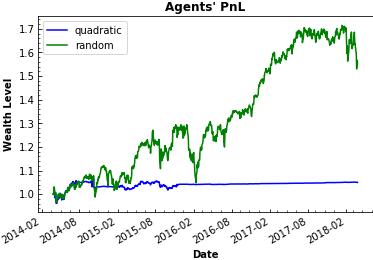

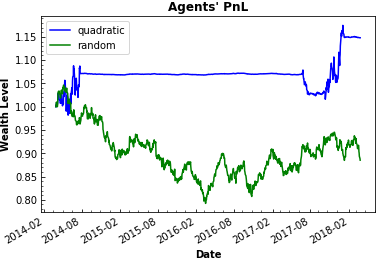

In [9]:
Arbitrage.run(returns, returns_gen,
              config['tickers'], config['freq'], config['window'], render=True)